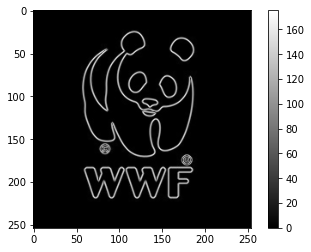

In [5]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
from PIL import Image

I = Image.open('wwf.jpg')
I = np.array(I)
I = I.astype(float)
I

# #added
# I17 = [[0 for k in range(len(I[0]))] for i in range(len(I))]
# for k in range(len(I)) :
#     for i in range(len(I[0])) :
#         avg = 0
#         for e in range(3) :
#             avg += I[k][i][e]
#         I17[k][i] = avg / 3 

# I17 = np.array(I17)
# #added


I17 = np.copy(I)

C = [[0 for j in range (1,len(I17[0]) - 1 )] for k in range (1, len(I17) - 1)]
for k in range (1, len(I17) - 1) :
    for j in range (1, len(I17[0]) - 1 ) :
        dx = ( I17[k,j+1] - I17[k,j-1] ) / 2
        dy = ( I17[k+1,j] - I17[k-1,j] ) / 2 
        C[k - 1][j - 1] = sqrt(dx*dx + dy*dy)


plt.imshow(C,cmap='gray')
plt.colorbar()


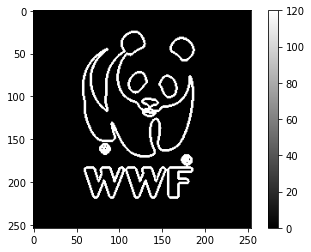

In [6]:
C1 = np.copy(C)

for l in range(len(C)) :
    for c in range(len(C[0])) :
        C1[l][C1[l] < 10] = 0
        C1[l][C1[l] > 10] = 120
        
plt.imshow(C1,cmap='gray')
plt.colorbar()

In [7]:
def Methode_des_cercles(M,val_dec,start_l, start_c) :
    nb_de_points = 0
    for l in range(len(M)) :
        for c in range(len(M[0])) :
            if (M[l][c] == val_dec):
                nb_de_points += 1

    traj = []
    points_restant = nb_de_points
    pivot_coordonnées = (start_l,start_c)
    while(points_restant > 0) :
        print(str(100 - (points_restant/nb_de_points)*100)+"pourcent effectué")
        traj.append(pivot_coordonnées)
        pivot_coordonnées = plus_proche_voisin(M,pivot_coordonnées, val_dec)
        points_restant -= 1
        M[pivot_coordonnées[0]][pivot_coordonnées[1]] = 0 #mis à 0 parce qu'il n'est plus à traité
    for couple in traj :
        print("{x : "+str(couple[1] - len(M[0])//2)+", y : "+str(couple[0] - len(M)//2)+"},")


def plus_proche_voisin(M,coordonnées_point, val_dec) : #val dec = la valeur des points qu'on recherche (!= 0)
    n = 1
    not_found = True 
    while(not_found) :
        for l in squareRange(coordonnées_point,n,M)[0] :
            for c in squareRange(coordonnées_point,n,M)[1] :
                if ( n == abs((coordonnées_point[0] - l)) + abs((coordonnées_point[1] - c)) ) :
                    if (M[l][c] == val_dec):
                        not_found = False
                        return (l,c)
        n += 1
        #print(n)

def squareRange(coordonnées_point,n,M) :
    # l doit aller de max(0,coordonnées_point[0] - n) à min(len(M),coordonnées_point[0] + n)
    L = [i for i in range(max(0,coordonnées_point[0] - n), min(len(M),coordonnées_point[0] + n))]
    # c doit aller de max(0,coordonnées_point[1] - n) à min(len(M[0]),coordonnées_point[1] + n)
    C = [i for i in range(max(0,coordonnées_point[1] - n), min(len(M[0]),coordonnées_point[1] + n))]
    return L,C

# def printedtraj(M,val_dec,start_l, start_c) :
#     traj = Methode_des_cercles(M,val_dec,start_l, start_c) 
#     for couple in traj :
#         print("{x : "+str(couple[0])+", y : "+str(couple[1])+"},")

In [7]:
Methode_des_cercles(C1,120,0,0)

0.0pourcent effectué
0.020193861066232444pourcent effectué
0.0403877221324791pourcent effectué
0.06058158319871154pourcent effectué
0.08077544426494399pourcent effectué
0.10096930533117643pourcent effectué
0.12116316639742308pourcent effectué
0.14135702746365553pourcent effectué
0.16155088852988797pourcent effectué
0.18174474959612041pourcent effectué
0.20193861066235286pourcent effectué
0.2221324717285995pourcent effectué
0.24232633279483196pourcent effectué
0.2625201938610644pourcent effectué
0.28271405492729684pourcent effectué
0.3029079159935293pourcent effectué
0.32310177705977594pourcent effectué
0.3432956381260084pourcent effectué
0.36348949919225504pourcent effectué
0.38368336025847327pourcent effectué
0.4038772213247199pourcent effectué
0.42407108239095237pourcent effectué
0.4442649434571848pourcent effectué
0.46445880452343147pourcent effectué
0.4846526655896639pourcent effectué
0.5048465266558964pourcent effectué
0.5250403877221288pourcent effectué
0.5452342487883755pourcent

12.984652665589664pourcent effectué
13.004846526655896pourcent effectué
13.025040387722129pourcent effectué
13.045234248788375pourcent effectué
13.065428109854608pourcent effectué
13.08562197092084pourcent effectué
13.105815831987073pourcent effectué
13.126009693053305pourcent effectué
13.146203554119552pourcent effectué
13.166397415185784pourcent effectué
13.186591276252031pourcent effectué
13.20678513731825pourcent effectué
13.226978998384482pourcent effectué
13.247172859450728pourcent effectué
13.26736672051696pourcent effectué
13.287560581583207pourcent effectué
13.30775444264944pourcent effectué
13.327948303715672pourcent effectué
13.348142164781905pourcent effectué
13.368336025848137pourcent effectué
13.388529886914384pourcent effectué
13.408723747980616pourcent effectué
13.428917609046849pourcent effectué
13.449111470113081pourcent effectué
13.469305331179328pourcent effectué
13.48949919224556pourcent effectué
13.509693053311793pourcent effectué
13.529886914378025pourcent effect

17.790791599353796pourcent effectué
17.810985460420042pourcent effectué
17.831179321486275pourcent effectué
17.851373182552493pourcent effectué
17.87156704361874pourcent effectué
17.891760904684972pourcent effectué
17.91195476575122pourcent effectué
17.93214862681745pourcent effectué
17.952342487883683pourcent effectué
17.972536348949916pourcent effectué
17.99273021001615pourcent effectué
18.012924071082395pourcent effectué
18.033117932148627pourcent effectué
18.05331179321486pourcent effectué
18.073505654281092pourcent effectué
18.09369951534734pourcent effectué
18.11389337641357pourcent effectué
18.134087237479804pourcent effectué
18.15428109854605pourcent effectué
18.17447495961227pourcent effectué
18.194668820678515pourcent effectué
18.214862681744748pourcent effectué
18.235056542810995pourcent effectué
18.255250403877227pourcent effectué
18.275444264943445pourcent effectué
18.295638126009692pourcent effectué
18.315831987075924pourcent effectué
18.33602584814217pourcent effectué
18

24.454765751211625pourcent effectué
24.47495961227787pourcent effectué
24.495153473344104pourcent effectué
24.515347334410336pourcent effectué
24.53554119547657pourcent effectué
24.555735056542815pourcent effectué
24.575928917609048pourcent effectué
24.59612277867528pourcent effectué
24.616316639741527pourcent effectué
24.636510500807745pourcent effectué
24.65670436187399pourcent effectué
24.676898222940224pourcent effectué
24.69709208400647pourcent effectué
24.717285945072703pourcent effectué
24.737479806138936pourcent effectué
24.757673667205168pourcent effectué
24.7778675282714pourcent effectué
24.798061389337647pourcent effectué
24.81825525040388pourcent effectué
24.838449111470112pourcent effectué
24.858642972536344pourcent effectué
24.878836833602577pourcent effectué
24.899030694668824pourcent effectué
24.919224555735056pourcent effectué
24.93941841680129pourcent effectué
24.95961227786752pourcent effectué
24.979806138933768pourcent effectué
25.0pourcent effectué
25.0201938610662

34.77382875605815pourcent effectué
34.7940226171244pourcent effectué
34.81421647819063pourcent effectué
34.83441033925686pourcent effectué
34.85460420032311pourcent effectué
34.87479806138933pourcent effectué
34.894991922455574pourcent effectué
34.91518578352181pourcent effectué
34.93537964458805pourcent effectué
34.955573505654286pourcent effectué
34.97576736672052pourcent effectué
34.99596122778675pourcent effectué
35.01615508885298pourcent effectué
35.03634894991923pourcent effectué
35.05654281098546pourcent effectué
35.076736672051695pourcent effectué
35.09693053311793pourcent effectué
35.11712439418416pourcent effectué
35.137318255250406pourcent effectué
35.15751211631664pourcent effectué
35.177705977382885pourcent effectué
35.1978998384491pourcent effectué
35.21809369951535pourcent effectué
35.23828756058158pourcent effectué
35.258481421647815pourcent effectué
35.27867528271406pourcent effectué
35.29886914378028pourcent effectué
35.31906300484653pourcent effectué
35.3392568659127

40.44830371567044pourcent effectué
40.468497576736674pourcent effectué
40.488691437802906pourcent effectué
40.508885298869146pourcent effectué
40.52907915993538pourcent effectué
40.54927302100162pourcent effectué
40.56946688206785pourcent effectué
40.58966074313409pourcent effectué
40.60985460420032pourcent effectué
40.630048465266555pourcent effectué
40.650242326332794pourcent effectué
40.67043618739903pourcent effectué
40.69063004846527pourcent effectué
40.7108239095315pourcent effectué
40.73101777059773pourcent effectué
40.75121163166398pourcent effectué
40.7714054927302pourcent effectué
40.79159935379645pourcent effectué
40.81179321486268pourcent effectué
40.83198707592892pourcent effectué
40.852180936995154pourcent effectué
40.87237479806139pourcent effectué
40.892568659127626pourcent effectué
40.91276252019386pourcent effectué
40.9329563812601pourcent effectué
40.95315024232633pourcent effectué
40.97334410339257pourcent effectué
40.9935379644588pourcent effectué
41.01373182552503

45.98142164781906pourcent effectué
46.001615508885294pourcent effectué
46.02180936995154pourcent effectué
46.04200323101777pourcent effectué
46.06219709208401pourcent effectué
46.082390953150245pourcent effectué
46.10258481421647pourcent effectué
46.12277867528272pourcent effectué
46.14297253634895pourcent effectué
46.16316639741519pourcent effectué
46.18336025848142pourcent effectué
46.20355411954766pourcent effectué
46.223747980613894pourcent effectué
46.243941841680126pourcent effectué
46.264135702746366pourcent effectué
46.2843295638126pourcent effectué
46.30452342487884pourcent effectué
46.32471728594507pourcent effectué
46.34491114701132pourcent effectué
46.36510500807754pourcent effectué
46.385298869143774pourcent effectué
46.40549273021002pourcent effectué
46.425686591276246pourcent effectué
46.44588045234249pourcent effectué
46.466074313408726pourcent effectué
46.486268174474965pourcent effectué
46.5064620355412pourcent effectué
46.52665589660743pourcent effectué
46.5468497576

52.827140549273025pourcent effectué
52.84733441033926pourcent effectué
52.8675282714055pourcent effectué
52.88772213247172pourcent effectué
52.90791599353796pourcent effectué
52.9281098546042pourcent effectué
52.948303715670434pourcent effectué
52.968497576736674pourcent effectué
52.988691437802906pourcent effectué
53.008885298869146pourcent effectué
53.02907915993538pourcent effectué
53.04927302100161pourcent effectué
53.06946688206785pourcent effectué
53.08966074313409pourcent effectué
53.10985460420032pourcent effectué
53.13004846526656pourcent effectué
53.150242326332794pourcent effectué
53.17043618739903pourcent effectué
53.190630048465266pourcent effectué
53.2108239095315pourcent effectué
53.23101777059774pourcent effectué
53.25121163166398pourcent effectué
53.27140549273021pourcent effectué
53.29159935379645pourcent effectué
53.31179321486268pourcent effectué
53.331987075928915pourcent effectué
53.352180936995154pourcent effectué
53.37237479806139pourcent effectué
53.39256865912

65.50888529886915pourcent effectué
65.52907915993538pourcent effectué
65.54927302100161pourcent effectué
65.56946688206784pourcent effectué
65.58966074313409pourcent effectué
65.60985460420032pourcent effectué
65.63004846526655pourcent effectué
65.6502423263328pourcent effectué
65.67043618739902pourcent effectué
65.69063004846527pourcent effectué
65.7108239095315pourcent effectué
65.73101777059773pourcent effectué
65.75121163166398pourcent effectué
65.77140549273021pourcent effectué
65.79159935379644pourcent effectué
65.81179321486269pourcent effectué
65.83198707592891pourcent effectué
65.85218093699515pourcent effectué
65.87237479806139pourcent effectué
65.89256865912762pourcent effectué
65.91276252019387pourcent effectué
65.9329563812601pourcent effectué
65.95315024232633pourcent effectué
65.97334410339258pourcent effectué
65.9935379644588pourcent effectué
66.01373182552504pourcent effectué
66.03392568659127pourcent effectué
66.0541195476575pourcent effectué
66.07431340872375pourcent

73.68739903069466pourcent effectué
73.7075928917609pourcent effectué
73.72778675282714pourcent effectué
73.74798061389338pourcent effectué
73.76817447495961pourcent effectué
73.78836833602585pourcent effectué
73.80856219709207pourcent effectué
73.82875605815832pourcent effectué
73.84894991922455pourcent effectué
73.86914378029078pourcent effectué
73.88933764135703pourcent effectué
73.90953150242326pourcent effectué
73.9297253634895pourcent effectué
73.94991922455573pourcent effectué
73.97011308562196pourcent effectué
73.99030694668821pourcent effectué
74.01050080775444pourcent effectué
74.03069466882067pourcent effectué
74.05088852988692pourcent effectué
74.07108239095315pourcent effectué
74.09127625201938pourcent effectué
74.11147011308562pourcent effectué
74.13166397415185pourcent effectué
74.1518578352181pourcent effectué
74.17205169628433pourcent effectué
74.19224555735056pourcent effectué
74.2124394184168pourcent effectué
74.23263327948304pourcent effectué
74.25282714054927pourcen

79.30129240710824pourcent effectué
79.32148626817448pourcent effectué
79.34168012924071pourcent effectué
79.36187399030695pourcent effectué
79.38206785137318pourcent effectué
79.40226171243941pourcent effectué
79.42245557350566pourcent effectué
79.44264943457189pourcent effectué
79.46284329563812pourcent effectué
79.48303715670437pourcent effectué
79.5032310177706pourcent effectué
79.52342487883683pourcent effectué
79.54361873990307pourcent effectué
79.5638126009693pourcent effectué
79.58400646203555pourcent effectué
79.60420032310178pourcent effectué
79.62439418416801pourcent effectué
79.64458804523426pourcent effectué
79.66478190630049pourcent effectué
79.68497576736672pourcent effectué
79.70516962843296pourcent effectué
79.72536348949919pourcent effectué
79.74555735056543pourcent effectué
79.76575121163167pourcent effectué
79.7859450726979pourcent effectué
79.80613893376415pourcent effectué
79.82633279483036pourcent effectué
79.84652665589661pourcent effectué
79.86672051696284pource

91.86187399030695pourcent effectué
91.88206785137318pourcent effectué
91.90226171243941pourcent effectué
91.92245557350566pourcent effectué
91.94264943457189pourcent effectué
91.96284329563812pourcent effectué
91.98303715670436pourcent effectué
92.0032310177706pourcent effectué
92.02342487883683pourcent effectué
92.04361873990307pourcent effectué
92.0638126009693pourcent effectué
92.08400646203555pourcent effectué
92.10420032310178pourcent effectué
92.12439418416801pourcent effectué
92.14458804523424pourcent effectué
92.16478190630049pourcent effectué
92.18497576736672pourcent effectué
92.20516962843296pourcent effectué
92.22536348949919pourcent effectué
92.24555735056543pourcent effectué
92.26575121163167pourcent effectué
92.2859450726979pourcent effectué
92.30613893376413pourcent effectué
92.32633279483038pourcent effectué
92.34652665589661pourcent effectué
92.36672051696284pourcent effectué
92.38691437802908pourcent effectué
92.40710823909532pourcent effectué
92.42730210016155pource

99.95961227786754pourcent effectué
99.97980613893377pourcent effectué
{x : -127, y : -127},
{x : -53, y : -76},
{x : -54, y : -75},
{x : -55, y : -74},
{x : -56, y : -73},
{x : -57, y : -72},
{x : -58, y : -71},
{x : -59, y : -70},
{x : -60, y : -69},
{x : -59, y : -68},
{x : -59, y : -69},
{x : -58, y : -70},
{x : -57, y : -71},
{x : -56, y : -72},
{x : -55, y : -73},
{x : -54, y : -74},
{x : -53, y : -75},
{x : -52, y : -76},
{x : -51, y : -77},
{x : -50, y : -78},
{x : -49, y : -79},
{x : -48, y : -78},
{x : -48, y : -79},
{x : -47, y : -80},
{x : -46, y : -81},
{x : -45, y : -80},
{x : -45, y : -81},
{x : -44, y : -82},
{x : -43, y : -81},
{x : -43, y : -82},
{x : -42, y : -83},
{x : -41, y : -82},
{x : -41, y : -83},
{x : -42, y : -82},
{x : -41, y : -81},
{x : -42, y : -81},
{x : -44, y : -81},
{x : -43, y : -80},
{x : -44, y : -80},
{x : -46, y : -80},
{x : -47, y : -79},
{x : -46, y : -78},
{x : -46, y : -79},
{x : -47, y : -78},
{x : -49, y : -78},
{x : -50, y : -77},
{x : -51

{x : -36, y : 10},
{x : -35, y : 11},
{x : -36, y : 11},
{x : -35, y : 12},
{x : -34, y : 11},
{x : -34, y : 10},
{x : -33, y : 11},
{x : -33, y : 10},
{x : -32, y : 9},
{x : -32, y : 8},
{x : -32, y : 7},
{x : -31, y : 9},
{x : -32, y : 10},
{x : -31, y : 11},
{x : -31, y : 10},
{x : -32, y : 11},
{x : -33, y : 12},
{x : -34, y : 12},
{x : -35, y : 13},
{x : -34, y : 14},
{x : -34, y : 13},
{x : -35, y : 14},
{x : -34, y : 15},
{x : -35, y : 15},
{x : -34, y : 16},
{x : -33, y : 15},
{x : -33, y : 14},
{x : -33, y : 13},
{x : -32, y : 12},
{x : -31, y : 13},
{x : -31, y : 12},
{x : -30, y : 11},
{x : -32, y : 13},
{x : -31, y : 14},
{x : -30, y : 13},
{x : -30, y : 12},
{x : -29, y : 14},
{x : -30, y : 14},
{x : -31, y : 15},
{x : -32, y : 16},
{x : -33, y : 16},
{x : -34, y : 17},
{x : -33, y : 18},
{x : -33, y : 17},
{x : -34, y : 18},
{x : -33, y : 19},
{x : -32, y : 18},
{x : -32, y : 17},
{x : -30, y : 16},
{x : -30, y : 15},
{x : -29, y : 16},
{x : -29, y : 15},
{x : -28, y : 16

{x : 50, y : 12},
{x : 51, y : 11},
{x : 51, y : 10},
{x : 51, y : 9},
{x : 52, y : 8},
{x : 52, y : 7},
{x : 52, y : 6},
{x : 52, y : 5},
{x : 53, y : 4},
{x : 53, y : 3},
{x : 53, y : 2},
{x : 54, y : 1},
{x : 54, y : 0},
{x : 54, y : -1},
{x : 54, y : -2},
{x : 55, y : -3},
{x : 55, y : -4},
{x : 55, y : -5},
{x : 55, y : -6},
{x : 55, y : -7},
{x : 56, y : -8},
{x : 56, y : -9},
{x : 56, y : -10},
{x : 56, y : -11},
{x : 56, y : -12},
{x : 56, y : -13},
{x : 57, y : -14},
{x : 57, y : -15},
{x : 57, y : -16},
{x : 57, y : -17},
{x : 57, y : -18},
{x : 57, y : -19},
{x : 57, y : -20},
{x : 57, y : -21},
{x : 57, y : -22},
{x : 58, y : -23},
{x : 58, y : -24},
{x : 58, y : -25},
{x : 58, y : -26},
{x : 58, y : -27},
{x : 58, y : -28},
{x : 58, y : -29},
{x : 58, y : -30},
{x : 58, y : -31},
{x : 58, y : -32},
{x : 58, y : -33},
{x : 58, y : -34},
{x : 58, y : -35},
{x : 58, y : -36},
{x : 58, y : -37},
{x : 58, y : -38},
{x : 58, y : -39},
{x : 58, y : -40},
{x : 58, y : -41},
{x : 5

{x : 52, y : 51},
{x : 51, y : 51},
{x : 52, y : 52},
{x : 51, y : 52},
{x : 50, y : 53},
{x : 51, y : 54},
{x : 51, y : 53},
{x : 52, y : 54},
{x : 52, y : 53},
{x : 53, y : 52},
{x : 53, y : 51},
{x : 54, y : 50},
{x : 55, y : 51},
{x : 55, y : 50},
{x : 56, y : 49},
{x : 56, y : 48},
{x : 57, y : 47},
{x : 58, y : 48},
{x : 58, y : 47},
{x : 57, y : 48},
{x : 58, y : 49},
{x : 57, y : 49},
{x : 56, y : 50},
{x : 57, y : 51},
{x : 57, y : 50},
{x : 56, y : 51},
{x : 54, y : 51},
{x : 55, y : 52},
{x : 54, y : 52},
{x : 53, y : 53},
{x : 52, y : 55},
{x : 51, y : 55},
{x : 50, y : 55},
{x : 49, y : 55},
{x : 48, y : 55},
{x : 47, y : 55},
{x : 46, y : 55},
{x : 45, y : 55},
{x : 44, y : 55},
{x : 43, y : 55},
{x : 42, y : 55},
{x : 41, y : 55},
{x : 40, y : 55},
{x : 39, y : 55},
{x : 38, y : 55},
{x : 37, y : 55},
{x : 36, y : 55},
{x : 35, y : 55},
{x : 34, y : 55},
{x : 33, y : 55},
{x : 32, y : 55},
{x : 31, y : 56},
{x : 30, y : 57},
{x : 29, y : 58},
{x : 28, y : 58},
{x : 27, y

{x : -3, y : 69},
{x : -3, y : 68},
{x : -2, y : 67},
{x : -1, y : 66},
{x : -1, y : 65},
{x : -1, y : 64},
{x : 0, y : 63},
{x : 0, y : 62},
{x : 0, y : 61},
{x : 0, y : 60},
{x : 0, y : 59},
{x : -1, y : 59},
{x : -1, y : 58},
{x : 1, y : 59},
{x : 1, y : 58},
{x : -1, y : 60},
{x : 1, y : 61},
{x : 1, y : 60},
{x : -1, y : 61},
{x : 1, y : 62},
{x : 2, y : 63},
{x : 2, y : 62},
{x : 1, y : 63},
{x : 0, y : 64},
{x : 1, y : 65},
{x : 1, y : 64},
{x : 0, y : 65},
{x : 1, y : 66},
{x : 0, y : 66},
{x : -1, y : 67},
{x : -2, y : 68},
{x : -1, y : 69},
{x : -1, y : 68},
{x : 0, y : 67},
{x : -2, y : 69},
{x : -3, y : 70},
{x : -4, y : 71},
{x : -3, y : 72},
{x : -3, y : 71},
{x : -2, y : 70},
{x : -1, y : 71},
{x : -1, y : 70},
{x : -2, y : 71},
{x : -4, y : 72},
{x : -3, y : 73},
{x : -2, y : 72},
{x : 0, y : 68},
{x : 4, y : 72},
{x : 3, y : 74},
{x : 4, y : 73},
{x : 3, y : 75},
{x : 4, y : 74},
{x : 5, y : 75},
{x : 4, y : 75},
{x : 3, y : 76},
{x : 2, y : 77},
{x : 4, y : 76},
{x : 

{x : -39, y : 35},
{x : -39, y : 34},
{x : -39, y : 33},
{x : -39, y : 32},
{x : -39, y : 31},
{x : -39, y : 30},
{x : -40, y : 30},
{x : -40, y : 29},
{x : -41, y : 29},
{x : -41, y : 28},
{x : -42, y : 28},
{x : -43, y : 28},
{x : -44, y : 28},
{x : -45, y : 28},
{x : -46, y : 28},
{x : -47, y : 29},
{x : -48, y : 30},
{x : -49, y : 31},
{x : -50, y : 32},
{x : -49, y : 33},
{x : -49, y : 32},
{x : -48, y : 31},
{x : -47, y : 30},
{x : -46, y : 29},
{x : -45, y : 30},
{x : -45, y : 29},
{x : -46, y : 30},
{x : -47, y : 31},
{x : -48, y : 32},
{x : -47, y : 33},
{x : -47, y : 32},
{x : -46, y : 31},
{x : -45, y : 32},
{x : -46, y : 32},
{x : -45, y : 33},
{x : -46, y : 33},
{x : -48, y : 33},
{x : -50, y : 33},
{x : -49, y : 34},
{x : -50, y : 34},
{x : -49, y : 35},
{x : -50, y : 35},
{x : -49, y : 36},
{x : -50, y : 36},
{x : -49, y : 37},
{x : -48, y : 36},
{x : -48, y : 35},
{x : -48, y : 34},
{x : -47, y : 35},
{x : -46, y : 34},
{x : -45, y : 35},
{x : -45, y : 34},
{x : -44, y 

{x : 10, y : -9},
{x : 9, y : -9},
{x : 10, y : -8},
{x : 9, y : -8},
{x : 7, y : -8},
{x : 6, y : -8},
{x : 9, y : -7},
{x : 11, y : -8},
{x : 12, y : -9},
{x : 13, y : -10},
{x : 14, y : -9},
{x : 14, y : -10},
{x : 13, y : -9},
{x : 12, y : -8},
{x : 11, y : -7},
{x : 10, y : -7},
{x : 12, y : -6},
{x : 12, y : -7},
{x : 13, y : -8},
{x : 14, y : -7},
{x : 14, y : -8},
{x : 15, y : -9},
{x : 15, y : -10},
{x : 16, y : -9},
{x : 16, y : -10},
{x : 17, y : -9},
{x : 17, y : -10},
{x : 18, y : -9},
{x : 18, y : -10},
{x : 19, y : -9},
{x : 19, y : -10},
{x : 20, y : -11},
{x : 22, y : -12},
{x : 22, y : -13},
{x : 21, y : -11},
{x : 20, y : -10},
{x : 16, y : -8},
{x : 15, y : -8},
{x : 16, y : -7},
{x : 15, y : -7},
{x : 13, y : -7},
{x : 14, y : -6},
{x : 13, y : -6},
{x : 12, y : -5},
{x : 11, y : -5},
{x : 10, y : -5},
{x : 9, y : -5},
{x : 10, y : -4},
{x : 9, y : -4},
{x : 8, y : -3},
{x : 11, y : -4},
{x : 10, y : -3},
{x : 9, y : -3},
{x : 12, y : -4},
{x : 13, y : -5},
{x : 15